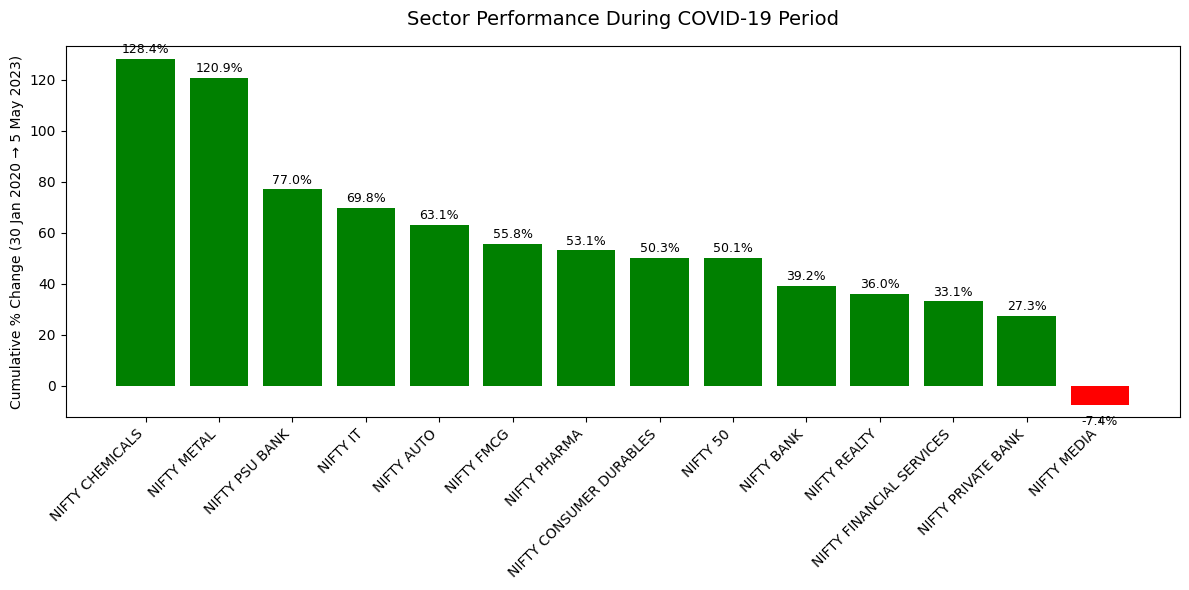

In [1]:
import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Folder Path ---
DATA_FOLDER = r"C:\Users\sohan\Downloads\archive (1)"  # update path if needed

# --- Load sector CSVs, skip Oil & Gas ---
csv_files = sorted(glob.glob(os.path.join(DATA_FOLDER, "*_cleaned.csv")))
sector_series = {}

for f in csv_files:
    name = os.path.splitext(os.path.basename(f))[0]
    if "Oil" in name or "Gas" in name:   # remove Oil & Gas
        continue
    name = name.replace("_cleaned", "").strip()
    
    df = pd.read_csv(f, parse_dates=["Date"])
    df = df.drop_duplicates(subset="Date").sort_values("Date").reset_index(drop=True)
    s = df.set_index("Date")["Close"].astype(float)
    s = s[~s.index.duplicated(keep="first")]
    sector_series[name] = s

# --- COVID-19 period ---
start_date = pd.to_datetime("2020-01-30")  # WHO declared global emergency
end_date = pd.to_datetime("2023-05-05")    # chosen consistent with image

# --- Compute cumulative % change per sector ---
cumulative_change = {}
for name, series in sector_series.items():
    try:
        start_price = series.loc[series.index >= start_date].iloc[0]
        end_price = series.loc[series.index <= end_date].iloc[-1]
        pct_change = (end_price - start_price) / start_price * 100
        cumulative_change[name] = pct_change
    except Exception:
        continue  # skip if missing dates

# --- Convert to DataFrame ---
cum_df = pd.DataFrame(list(cumulative_change.items()), columns=['Sector', 'Cumulative Change (%)'])
cum_df.sort_values('Cumulative Change (%)', ascending=False, inplace=True)

# --- Plot ---
plt.figure(figsize=(12,6))
colors = ['green' if x > 0 else 'red' for x in cum_df['Cumulative Change (%)']]
bars = plt.bar(cum_df['Sector'], cum_df['Cumulative Change (%)'], color=colors)

# --- Annotate each bar with value ---
for i, val in enumerate(cum_df['Cumulative Change (%)']):
    plt.text(i, val + (1 if val > 0 else -4), f"{val:.1f}%", 
             ha='center', va='bottom' if val > 0 else 'top', fontsize=9)

# --- Formatting ---
plt.xticks(rotation=45, ha='right')
plt.ylabel('Cumulative % Change (30 Jan 2020 → 5 May 2023)')
plt.title('Sector Performance During COVID-19 Period', fontsize=14, pad=15)
plt.ylim(min(cum_df['Cumulative Change (%)']) - 5, max(cum_df['Cumulative Change (%)']) + 5)
plt.tight_layout()
plt.show()

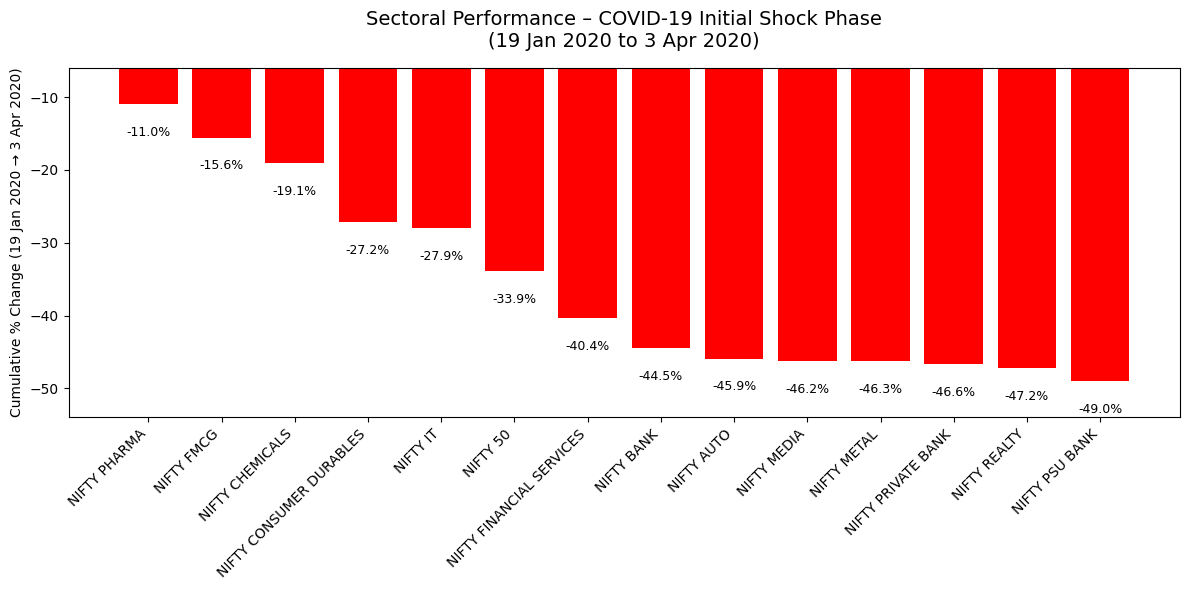

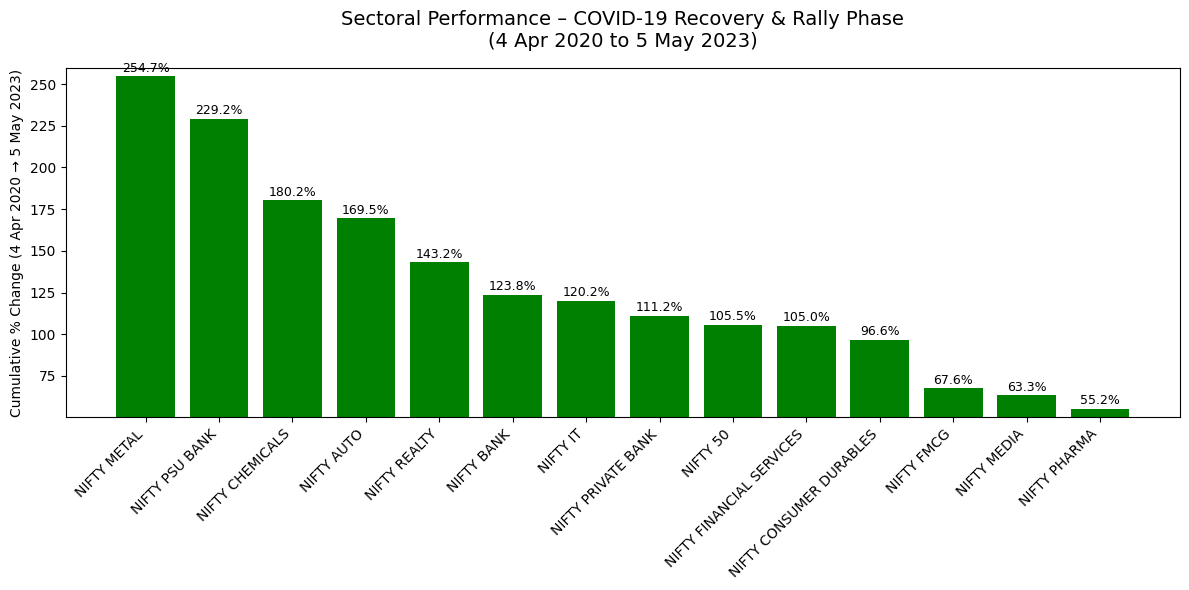

In [1]:
import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Folder Path ---
DATA_FOLDER = r"C:\Users\sohan\Downloads\archive (1)"  # update if needed

# --- Load sector CSVs ---
csv_files = sorted(glob.glob(os.path.join(DATA_FOLDER, "*_cleaned.csv")))
sector_series = {}

for f in csv_files:
    name = os.path.splitext(os.path.basename(f))[0]
    if "Oil" in name or "Gas" in name:   # remove Oil & Gas
        continue
    name = name.replace("_cleaned", "").strip()
    df = pd.read_csv(f, parse_dates=["Date"])
    df = df.drop_duplicates(subset="Date").sort_values("Date").reset_index(drop=True)
    s = df.set_index("Date")["Close"].astype(float)
    s = s[~s.index.duplicated(keep="first")]
    sector_series[name] = s

# --- Define COVID Phases ---
shock_start = pd.to_datetime("2020-01-19")
shock_end = pd.to_datetime("2020-04-03")
recovery_start = pd.to_datetime("2020-04-04")
recovery_end = pd.to_datetime("2023-05-05")

# --- Function to compute % change for each phase ---
def compute_phase_change(start_date, end_date):
    phase_change = {}
    for name, series in sector_series.items():
        try:
            start_price = series.loc[series.index >= start_date].iloc[0]
            end_price = series.loc[series.index <= end_date].iloc[-1]
            pct_change = (end_price - start_price) / start_price * 100
            phase_change[name] = pct_change
        except Exception:
            continue
    df = pd.DataFrame(list(phase_change.items()), columns=['Sector', 'Change (%)'])
    df.sort_values('Change (%)', ascending=False, inplace=True)
    return df

# --- Compute changes ---
shock_df = compute_phase_change(shock_start, shock_end)
recovery_df = compute_phase_change(recovery_start, recovery_end)

# --- Plot Function ---
def plot_sector_changes(df, title, ylabel, date_range):
    plt.figure(figsize=(12, 6))
    colors = ['green' if x > 0 else 'red' for x in df['Change (%)']]
    bars = plt.bar(df['Sector'], df['Change (%)'], color=colors)
    
    # Annotate
    for i, val in enumerate(df['Change (%)']):
        plt.text(i, val + (1 if val > 0 else -3), f"{val:.1f}%",
                 ha='center', va='bottom' if val > 0 else 'top', fontsize=9)
    
    plt.xticks(rotation=45, ha='right')
    plt.ylabel(ylabel)
    plt.title(f"{title}\n({date_range})", fontsize=14, pad=15)
    plt.ylim(min(df['Change (%)']) - 5, max(df['Change (%)']) + 5)
    plt.tight_layout()
    plt.show()

# --- Plot Phase 1 and Phase 2 ---
plot_sector_changes(
    shock_df,
    "Sectoral Performance – COVID-19 Initial Shock Phase",
    "Cumulative % Change (19 Jan 2020 → 3 Apr 2020)",
    "19 Jan 2020 to 3 Apr 2020"
)

plot_sector_changes(
    recovery_df,
    "Sectoral Performance – COVID-19 Recovery & Rally Phase",
    "Cumulative % Change (4 Apr 2020 → 5 May 2023)",
    "4 Apr 2020 to 5 May 2023"
)
